<a href="https://colab.research.google.com/github/MarshallPotts/CSE450-Machine-Learning/blob/main/case_study4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dropout
from keras import Sequential
#!pip install tensorflow keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns

print(tf.__version__)


2.18.0


In [4]:
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112475 entries, 0 to 112474
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dteday        112475 non-null  object 
 1   hr            112475 non-null  float64
 2   casual        112475 non-null  int64  
 3   registered    112475 non-null  int64  
 4   temp_c        112475 non-null  float64
 5   feels_like_c  112475 non-null  float64
 6   hum           112475 non-null  float64
 7   windspeed     112475 non-null  float64
 8   weathersit    112475 non-null  int64  
 9   season        112475 non-null  int64  
 10  holiday       112475 non-null  int64  
 11  workingday    112475 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 10.3+ MB


In [5]:
bikes.head()

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
0,1/1/2011,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0
1,1/1/2011,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0
2,1/1/2011,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0
3,1/1/2011,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0
4,1/1/2011,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0


In [6]:
#drop NA values
bikes.dropna(axis=0, how="any", inplace=True)

In [7]:
#get the dteday into the right format to use for tensorflow
bikes_date_str = bikes['dteday'].astype(str)  #convert to a string
bikes_date = pd.to_datetime(bikes_date_str)   #change string to datetime
bikes["dteday"] = bikes_date  #add to frame
bikes["dteday"] = bikes["dteday"] + pd.to_timedelta(bikes["hr"], unit='h')  #add the hours as a datetime timedelta
bikes.tail()

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
112470,2023-10-31 19:00:00,19.0,241,594,10.2,10.2,0.4516,8.4,2,4,0,1
112471,2023-10-31 20:00:00,20.0,171,450,8.9,7.5,0.5268,9.3,1,4,0,1
112472,2023-10-31 21:00:00,21.0,176,402,7.7,6.4,0.5756,7.8,1,4,0,1
112473,2023-10-31 22:00:00,22.0,106,257,8.0,8.0,0.5604,0.0,1,4,0,1
112474,2023-10-31 23:00:00,23.0,78,135,6.5,6.5,0.6401,4.5,1,4,0,1


In [8]:
#add day, month and year columns.
bikes['day'] = bikes['dteday'].dt.day
bikes['month'] = bikes['dteday'].dt.month
bikes['year'] = bikes['dteday'].dt.year
bikes.head()

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,day,month,year
0,2011-01-01 00:00:00,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0,1,1,2011
1,2011-01-01 01:00:00,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0,1,1,2011
2,2011-01-01 02:00:00,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0,1,1,2011
3,2011-01-01 03:00:00,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0,1,1,2011
4,2011-01-01 04:00:00,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0,1,1,2011


In [9]:
#show the end
bikes.tail()

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,day,month,year
112470,2023-10-31 19:00:00,19.0,241,594,10.2,10.2,0.4516,8.4,2,4,0,1,31,10,2023
112471,2023-10-31 20:00:00,20.0,171,450,8.9,7.5,0.5268,9.3,1,4,0,1,31,10,2023
112472,2023-10-31 21:00:00,21.0,176,402,7.7,6.4,0.5756,7.8,1,4,0,1,31,10,2023
112473,2023-10-31 22:00:00,22.0,106,257,8.0,8.0,0.5604,0.0,1,4,0,1,31,10,2023
112474,2023-10-31 23:00:00,23.0,78,135,6.5,6.5,0.6401,4.5,1,4,0,1,31,10,2023


<Axes: xlabel='dteday', ylabel='holiday'>

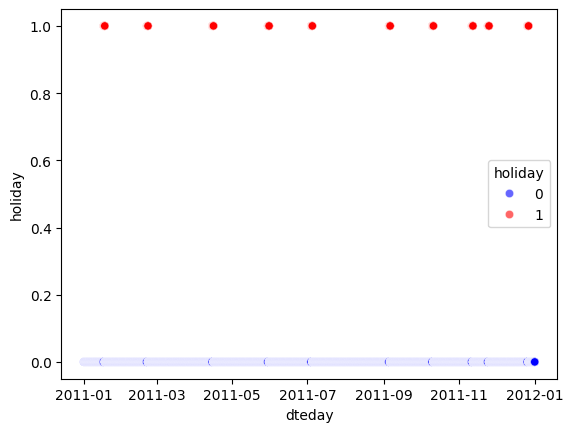

In [10]:
#filter the years
bikes_2011 = bikes[bikes['year'] == 2011]
bikes_2012 = bikes[bikes['year'] == 2012]
bikes_2013 = bikes[bikes['year'] == 2013]
bikes_2014 = bikes[bikes['year'] == 2014]
bikes_2015 = bikes[bikes['year'] == 2015]
bikes_2016 = bikes[bikes['year'] == 2016]
bikes_2017 = bikes[bikes['year'] == 2017]
bikes_2018 = bikes[bikes['year'] == 2018]
bikes_2019 = bikes[bikes['year'] == 2019]
bikes_2020 = bikes[bikes['year'] == 2020]
bikes_2021 = bikes[bikes['year'] == 2021]
bikes_2022 = bikes[bikes['year'] == 2022]
bikes_2023 = bikes[bikes['year'] == 2023]

bikes_2011.head()
#graph the date vs the holidays
sns.scatterplot(x=bikes_2011["dteday"], y=bikes_2011["holiday"], hue=bikes_2011['holiday'], palette={0: "blue", 1: "red"}, alpha=0.6)

In [13]:
#days that are holidays in 2011
holidays_2011 = bikes_2011[(bikes_2011['holiday'] == 1) & (bikes_2011["hr"] == 1)]
holidays_2011.head(20)  #why is there a holiday on december 26?

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,day,month,year
385,2011-01-17 01:00:00,1.0,1,15,0.6,-3.0,0.4518,12.1,2,1,1,0,17,1,2011
1225,2011-02-21 01:00:00,1.0,2,11,7.7,4.3,0.4233,21.4,2,1,1,0,21,2,2011
2496,2011-04-15 01:00:00,1.0,6,9,12.3,12.3,0.6725,0.5,1,2,1,0,15,4,2011
3576,2011-05-30 01:00:00,1.0,26,52,22.9,22.9,0.9403,12.5,1,2,1,0,30,5,2011
4416,2011-07-04 01:00:00,1.0,43,74,22.9,22.9,0.8426,8.9,3,3,1,0,4,7,2011
5928,2011-09-05 01:00:00,1.0,19,35,25.8,25.8,0.7350,13.8,2,3,1,0,5,9,2011
6768,2011-10-10 01:00:00,1.0,4,30,15.5,15.5,0.9368,0.0,1,4,1,0,10,10,2011
7536,2011-11-11 01:00:00,1.0,3,16,6.9,3.2,0.5705,21.8,1,4,1,0,11,11,2011
7848,2011-11-24 01:00:00,1.0,1,23,7.0,2.9,0.5767,27.0,1,4,1,0,24,11,2011
8616,2011-12-26 01:00:00,1.0,3,7,4.3,1.5,0.5771,11.9,1,1,1,0,26,12,2011


In [14]:
#days that are holidays in 2023
holidays_2023 = bikes_2023[(bikes_2023['holiday'] == 1) & (bikes_2023["hr"] == 1)]
holidays_2023.head(20)  #why is there a holiday on december 26?

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,day,month,year
105205,2023-01-02 01:00:00,1.0,8,9,7.5,7.5,0.9074,0.7,1,1,1,0,2,1,2023
105541,2023-01-16 01:00:00,1.0,10,22,-0.2,-3.6,0.5590,10.2,1,1,1,0,16,1,2023
106381,2023-02-20 01:00:00,1.0,13,20,11.0,11.0,0.7717,16.3,1,1,1,0,20,2,2023
107700,2023-04-16 01:00:00,1.0,111,124,18.0,18.0,0.9126,12.1,1,2,1,0,16,4,2023
108732,2023-05-29 01:00:00,1.0,44,62,20.4,20.4,0.6610,10.2,2,2,1,0,29,5,2023
109236,2023-06-19 01:00:00,1.0,34,43,21.3,21.3,0.6190,5.3,1,2,1,0,19,6,2023
109596,2023-07-04 01:00:00,1.0,45,44,23.7,23.7,0.8741,12.6,3,3,1,0,4,7,2023
111084,2023-09-04 01:00:00,1.0,67,68,25.8,25.8,0.7097,5.1,1,3,1,0,4,9,2023
111924,2023-10-09 01:00:00,1.0,21,30,10.0,10.0,0.5715,10.2,1,4,1,0,9,10,2023


In [21]:
#convert datetime into epochs
bikes['dteday'] = bikes['dteday'].astype(int) / 10**9 #convert to seconds

#remove hour column
bikes = bikes.drop(columns=['hr'])

bikes.head()

,dteday,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,day,month,year
0,1.293840e+09,3,13,3.0,3.0,0.7957,0.8,1,1,0,0,1,1,2011
1,1.293844e+09,8,30,1.7,1.7,0.8272,0.8,1,1,0,0,1,1,2011
2,1.293847e+09,5,26,1.9,1.9,0.8157,1.1,1,1,0,0,1,1,2011
3,1.293851e+09,3,9,2.5,2.5,0.7831,0.8,1,1,0,0,1,1,2011
4,1.293854e+09,0,1,2.0,2.0,0.8075,1.1,1,1,0,0,1,1,2011


In [ ]:
#create dataframe for the model
x = bikes.drop(columns=['registered','casual'])
y = bikes[['registered','casual']]
x.head()

In [ ]:
#train test split
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#scale the data
scaler = MinMaxScaler().fit(x_test)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



In [ ]:
#build a sequential NN
model = Sequential()
model.add(layers.Dense(128, input_dim=len(x_train[0]), activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='relu'))

model.summary()

# Define a learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,  # Starting learning rate
    decay_steps=10000,            # Steps before applying decay
    decay_rate=0.96,              # Multiplicative factor
    staircase=True                # If True, learning rate decays at discrete intervals
)

#complie module
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['mean_squared_error'])





In [2]:
early_stop = keras.callbacks.EarlyStopping(monitor="val_mean_squared_error", patience=30, mode='max')

history=model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stop])
hist = pd.DataFrame(history.history)




NameError: name 'keras' is not defined

In [ ]:
pred = np.round(model.predict(x_test),1)
mse = mean_squared_error(y_test, pred)
pred


In [ ]:
print("Root Mean Squared Error: ", mse)
r2 = r2_score(y_test, pred)
print("R2 Score: ", r2)